# Overlap between the established and proposed MPAs with the different zone categories

- established MPAs : South Orkney Island, Ross Sea MPA
- proposed MPAs : Weddell Sea MPA, D1 MPA, East Antractic MPA

In [2]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import rioxarray
import os


import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Cannot find header.dxf (GDAL_DATA is not defined)


In [3]:
import os
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration')
#os.chdir('./Key_Areas_krill_carbon_sequestration/outputs_formated_data/')

In [4]:
# load the zones file
zones_krill_carbon = rioxarray.open_rasterio('./output_results/zones_krill_carbon.nc')
zones_krill_carbon.rio.write_crs('epsg:4326', inplace=True)
zones_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
[2700 values with dtype=float64]
Coordinates:
  * variable     (variable) <U9 'Zone_type'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  Zone_type
    _FillValue:                  nan
    scale_factor:                1.0
    add_offset:                  0.0

# Established MPAs
- The Ross Sea MPA (Conservation measure 91-05) which is devided in several zones with differnt objectives and limitations. We consider only the parts that are closed to krill fishing.
- The South Orkney Island MPA (conservation mesure 91-03)

In [5]:
# Open shape file with MPA polygon
MPAs = gpd.read_file('./data_envir/MPA/mpasPolygon.shp')
MPAs

,GAR_ID,GAR_Name,GAR_Short_,GAR_Long_L,GAR_Start_,GAR_End_Da,GAR_Descri,GAR_Refere,CreatedBy,CreatedOn,ModifiedBy,ModifiedOn,GAR_Size,geometry
0,92641,MPA RS-GPZi,GPZi,RS-GPZi,2016-12-01,None,The area bounded by a line starting where the ...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,1555850.51,"POLYGON ((180.00000 -73.50000, -180.00000 -76...."
1,92642,MPA RS-GPZii,GPZii,RS-GPZii,2016-12-01,None,The area bounded by a line starting at 62°30'S...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,74765.21,"POLYGON ((163.83333 -62.50000, 163.00000 -62.5..."
2,92643,MPA RS-GPZiii,GPZiii,RS-GPZiii,2016-12-01,None,The area bounded by a line starting at 69°S 17...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,21097.81,"POLYGON ((-179.00000 -69.00000, -179.00000 -66..."
3,92644,MPA RS-KRZ,KRZ,RS-KRZ,2016-12-01,None,The Krill Research Zone is bounded by a line s...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,328750.16,"POLYGON ((160.00000 -65.00000, 160.00000 -69.6..."
4,92645,MPA RS-SRZ,SRZ,RS-SRZ,2016-12-01,None,The Special Research Zone is bounded by a line...,Conservation Measure 91-05 (2016),Tim,2016-11-16,Tim,2016-11-16,109563.21,"POLYGON ((-180.00000 -76.00000, -180.00000 -73..."
5,92652,MPA SO-SS,SOSS,SO-SS,2009-12-01,None,The South Orkney Islands southern shelf marine...,CCAMLR-XXVIII paragraphs 7.1; CM 91-03,Tim,2016-11-17,Tim,2016-11-17,93750.79,"POLYGON ((-41.00000 -61.50000, -41.00000 -64.0..."


In [6]:
Ross_area = MPAs.loc[[0, 1, 2, 4]]['GAR_Size'].sum()
SOrk_area = MPAs.loc[5]['GAR_Size']

print(Ross_area, SOrk_area)

1761276.74 93750.79


## Extract the zones categories matching the MPA polygon

In [7]:
MPAs.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### South Orkney Island

In [8]:
# clip MPAs[5:] = the South Orkney MPA
SOrkney_krill_carbon = zones_krill_carbon.rio.clip(MPAs[5:].geometry.values, MPAs.crs, drop=False) # false so it keep the inital shape and fill with Na
SOrkney_krill_carbon

<xarray.DataArray '__xarray_dataarray_variable__' (variable: 1, y: 15, x: 180)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * variable     (variable) <U9 'Zone_type'
  * x            (x) float64 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * y            (y) float64 -47.0 -49.0 -51.0 -53.0 ... -69.0 -71.0 -73.0 -75.0
    spatial_ref  int32 0
Attributes:
    NETCDF_DIM_EXTRA:            {variable}
    NETCDF_DIM_variable_DEF:     [ 1. 12.]
    NETCDF_DIM_variable_VALUES:  Zone_type
    scale_factor:                1.0
    add_offset:                  0.0
    _FillValue:                  nan

Text(0.5, 1.0, 'South Orkney Island MPA')

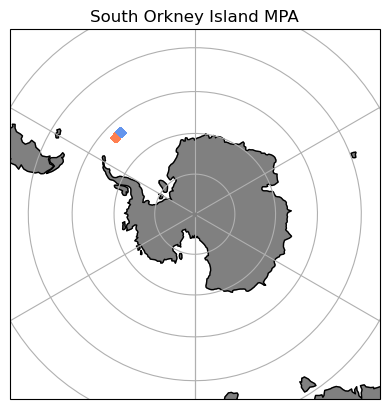

In [9]:
map_proj = ccrs.SouthPolarStereo()

p = SOrkney_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[1, 2, 3, 4], 
    colors = ['cornflowerblue','mediumaquamarine', 'coral']
)  
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
#cb = plt.colorbar(p, label = 'Zones', shrink = 0.8)
plt.title('South Orkney Island MPA')

#### Ross sea MPA

In [27]:
MPA_Ross = gpd.read_file('./data_envir/MPA/Ross_sea_MPA_GPZ.shp')
MPA_Ross

# check crs
print(MPA_Ross.crs) # epsg:4326
MPA_Ross.geometry.values

epsg:4326


<GeometryArray>
[<POLYGON ((-180 -76, -170 -76, -170 -76.3, -164 -76.3, -164 -75, -170 -75, -...>,
 <POLYGON ((160 -69.1, 160 -65, 173.45 -65, 173.45 -73.3, 180 -73.3, 180 -78....>,
                  <POLYGON ((163 -62.3, 163 -60, 168 -60, 168 -62.3, 163 -62.3))>,
         <POLYGON ((178.99 -69, 178.99 -66.45, 180 -66.45, 180 -69, 178.99 -69))>,
             <POLYGON ((-179 -69, -180 -69, -180 -66.45, -179 -66.45, -179 -69))>]
Length: 5, dtype: geometry

In [28]:
MPA_Ross.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [29]:
# clip MPAs 
Ross_krill_carbon = zones_krill_carbon.rio.clip(MPA_Ross.geometry.values, MPA_Ross.crs, drop=False)

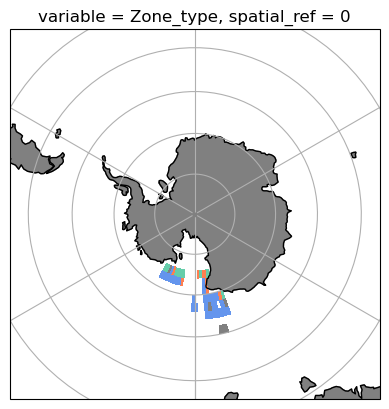

In [30]:
map_proj = ccrs.SouthPolarStereo()

p = Ross_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey', 'cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

### Save the extract of established MPAs

In [21]:
# arrays of the MPA separatly 
Ross_krill_carbon.to_netcdf('./output_results/Ross_mpa.nc')
SOrkney_krill_carbon.to_netcdf('./output_results/SOrkney_mpa.nc')

# Proposed MPAs

- Weddell Sea MPA
- D1 MPA
- East Antarctic MPA

## Weddell Sea

In [32]:
MPA_weddell = gpd.read_file('./data_envir/MPA/Weddell_sea_MPA.shp')
MPA_weddell.drop(index=[1], inplace = True) # take only the general protection zone

# check crs
print(MPA_weddell.crs) # epsg:4326
MPA_weddell.geometry.values

epsg:4326


<GeometryArray>
[<POLYGON ((0 -69, -2 -69, -2 -69.75, -4.75 -69.75, -4.75 -69, -6.25 -69, -6....>]
Length: 1, dtype: geometry

In [33]:
# clip MPAs 
Weddell_krill_carbon = zones_krill_carbon.rio.clip(MPA_weddell.geometry.values, MPA_weddell.crs, drop=False) # false so it keep the inital shape and fill with Na

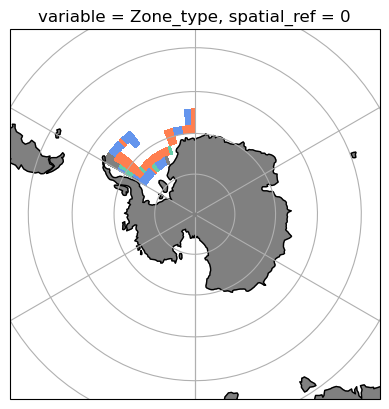

In [34]:
map_proj = ccrs.SouthPolarStereo()

p = Weddell_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

## D1 MPA

In [35]:
D1_MPA = gpd.read_file('./data_envir/MPA/D1_MPA.shp')
D1_MPA# all rows are general protection zone polygons, closed to krill fihsing all year round

,row_id,Name,geometry
0,0,D1MPA_GPZ-EI,"POLYGON ((-53.44000 -60.97000, -53.44000 -61.7..."
1,1,D1MPA_GPZ-JOIN,"POLYGON ((-56.08000 -63.00000, -53.44000 -63.0..."
2,2,D1MPA_GPZ-LIC,"POLYGON ((-60.25000 -62.00000, -60.14000 -62.2..."
3,3,D1MPA_GPZ-GSW,"POLYGON ((-63.70000 -64.00000, -62.20000 -64.9..."
4,4,D1MPA_GPZ-GC,"POLYGON ((-65.20000 -64.89000, -63.63000 -65.6..."
5,5,D1MPA_GPZ-MB,"POLYGON ((-68.05000 -66.29000, -65.84000 -66.9..."
6,6,D1MPA_GPZ-SWAP_coast,"POLYGON ((-70.00000 -67.00000, -70.00000 -74.2..."
7,7,D1MPA_GPZ-SWAP_shelf,"POLYGON ((-70.00000 -66.00000, -70.00000 -67.0..."
8,8,D1MPA_GPZ-SOI,"POLYGON ((-43.50000 -60.25000, -43.50000 -61.5..."


In [36]:
# clip MPAs 
D1_krill_carbon = zones_krill_carbon.rio.clip(D1_MPA.geometry.values, D1_MPA.crs, drop=False) # false so it keep the inital shape and fill with Na

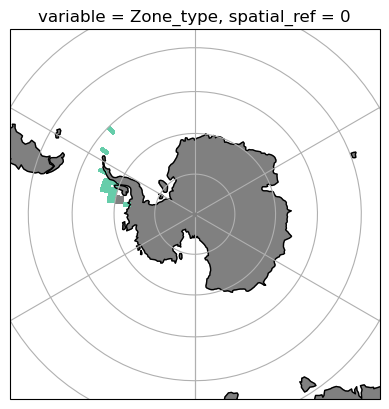

In [37]:
map_proj = ccrs.SouthPolarStereo()

p = D1_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

# East Antarctic MPA

In [38]:
EA_MPA = gpd.read_file('./data_envir/MPA/EA_MPA.shp')
EA_MPA

,row_id,Name,geometry
0,0,EAMPA-USM,"POLYGON ((136.00000 -65.75000, 136.00000 -63.5..."


In [39]:
# clip MPAs 
EA_krill_carbon = zones_krill_carbon.rio.clip(EA_MPA.geometry.values, EA_MPA.crs, drop=False) # false so it keep the inital shape and fill with Na

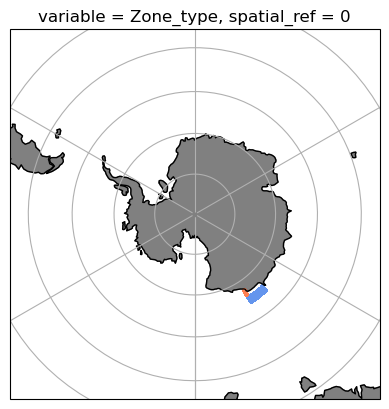

In [40]:
map_proj = ccrs.SouthPolarStereo()

p = EA_krill_carbon.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    add_colorbar = False,
    levels=[0, 1, 2, 3, 4], 
    colors = ['grey','cornflowerblue', 'mediumaquamarine',  'coral']
    #cmap="PuBu",
    #title = 'mean time of carbon sequesration'
)  

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)

plt.show()

### Save proposed MPAs

In [31]:
# arrays of the MPA separatly
Weddell_krill_carbon.to_netcdf('./output_results/Weddell_mpa.nc')
D1_krill_carbon.to_netcdf('./output_results/D1_mpa.nc')
EA_krill_carbon.to_netcdf('./output_results/EA_mpa.nc')

# Key numbers and areas
- Area of the MPA (given by the CCAMLR or calculated based on the 2°x2° grid)
- Calculate the % of each zone type in the MPAs
- Calculate the protection level (% of each zone type covered by MPAs)

In [41]:
# load area file from OCIM
OCIM = xr.open_dataset('./outputs_formated_data/fseq_OCIM2_48L_interpolated_SO.nc')

# transform area array into a dataframe and crop the file à -45°S
area_df = OCIM[['AREA', 'MASK']].isel(depth=0).to_dataframe().drop(['depth'], axis = 1).reset_index()
area_df = area_df[area_df['latitude'] <=-45].set_index(['latitude', 'longitude'])

## calculate the area of the ocean (remove land) => multiply be the proportion of the ocean in cell (= MASK : 1=ocean, 0=land, or %o each)
area_df['True_area'] = area_df['AREA']*area_df['MASK']
area_df # 3240  rows

AREA      MASK     True_area
latitude longitude                                      
-79      -179.0     9.332850e+09  0.061111  5.703408e+08
         -177.0     9.332850e+09  0.061111  5.703408e+08
         -175.0     9.332850e+09  0.061111  5.703408e+08
         -173.0     9.332850e+09  0.061111  5.703408e+08
         -171.0     9.332850e+09  0.061111  5.703408e+08
...                          ...       ...           ...
-45       171.0     3.458337e+10  0.750000  2.593752e+10
          173.0     3.458337e+10  1.000000  3.458337e+10
          175.0     3.458337e+10  1.000000  3.458337e+10
          177.0     3.458337e+10  1.000000  3.458337e+10
          179.0     3.458337e+10  1.000000  3.458337e+10

[3240 rows x 3 columns]

### Convert the xarrays into df

In [42]:
SOrkney_krill_carbon_df = SOrkney_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
SOrkney_krill_carbon_df = SOrkney_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
SOrkney_krill_carbon_df['MPA_name'] = 'SOrkney_protected'
# SOrkney_krill_carbon_df

Ross_krill_carbon_df = Ross_krill_carbon.to_dataframe(name="Zone_type").reset_index().drop(['variable'], axis =1)
Ross_krill_carbon_df = Ross_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
Ross_krill_carbon_df['MPA_name'] = 'Ross_protected'
# Ross_krill_carbon_df

Weddell_krill_carbon_df = Weddell_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
Weddell_krill_carbon_df = Weddell_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
Weddell_krill_carbon_df['MPA_name'] = 'Weddell_protected'
# Weddell_krill_carbon_df

D1_krill_carbon_df = D1_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
D1_krill_carbon_df = D1_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
D1_krill_carbon_df['MPA_name'] = 'D1_protected'
# D1_krill_carbon_df

EA_krill_carbon_df = EA_krill_carbon.to_dataframe().reset_index().drop(['variable', 'spatial_ref'], axis =1).rename(columns={'__xarray_dataarray_variable__': 'Zone_type'})
EA_krill_carbon_df = EA_krill_carbon_df.rename(columns={'y': 'latitude', 'x': 'longitude'}).dropna().set_index(['latitude', 'longitude'])
EA_krill_carbon_df['MPA_name'] = 'EA_protected'
# EA_krill_carbon_df

In [43]:
mpas_carbon_df = pd.concat([Ross_krill_carbon_df, SOrkney_krill_carbon_df, Weddell_krill_carbon_df, D1_krill_carbon_df, EA_krill_carbon_df])
mpas_carbon_df = mpas_carbon_df.join(other = area_df, how = 'left')
mpas_carbon_df # 173 

spatial_ref  Zone_type        MPA_name          AREA  \
latitude longitude                                                         
-61.0    165.0              0.0        0.0  Ross_protected  2.371193e+10   
         167.0              0.0        0.0  Ross_protected  2.371193e+10   
-65.0    161.0              0.0        1.0  Ross_protected  2.067035e+10   
         163.0              0.0        1.0  Ross_protected  2.067035e+10   
         165.0              0.0        1.0  Ross_protected  2.067035e+10   
...                         ...        ...             ...           ...   
         141.0              NaN        1.0    EA_protected  2.067035e+10   
         143.0              NaN        1.0    EA_protected  2.067035e+10   
         145.0              NaN        1.0    EA_protected  2.067035e+10   
         147.0              NaN        1.0    EA_protected  2.067035e+10   
-67.0    147.0              NaN        3.0    EA_protected  1.911083e+10   

                    MASK     True_area  
latitude longitude                      
-61.0    165.0       1.0  2.371193e+10  
         167.0       1.0  2.371193e+10  
-65.0    161.0       1.0  2.067035e+10  
         163.0       1.0  2.067035e+10  
         165.0       1.0  2.067035e+10  
...                  ...           ...  
         141.0       1.0  2.067035e+10  
         143.0       1.0  2.067035e+10  
         145.0       1.0  2.067035e+10  
         147.0       1.0  2.067035e+10  
-67.0    147.0       1.0  1.911083e+10  

[168 rows x 6 columns]

In [44]:
# area of the different MPAs based on the 2°x2° grid in m²
mpas_carbon_df.groupby(['MPA_name'])[['True_area']].sum()

,True_area
MPA_name,
D1_protected,3.090874e+11
EA_protected,1.431329e+11
Ross_protected,8.901703e+11
SOrkney_protected,8.881868e+10
Weddell_protected,1.372016e+12


### Add the area of cells to the df

In [45]:
SOrkney_krill_carbon_df = SOrkney_krill_carbon_df.join(other = area_df, how = 'left')
Ross_krill_carbon_df = Ross_krill_carbon_df.join(other = area_df, how = 'left')
Weddell_krill_carbon_df = Weddell_krill_carbon_df.join(other = area_df, how = 'left')
D1_krill_carbon_df = D1_krill_carbon_df.join(other = area_df, how = 'left')
EA_krill_carbon_df = EA_krill_carbon_df.join(other = area_df, how = 'left')

In [46]:
SOrkney_krill_carbon_grouped = SOrkney_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
Ross_krill_carbon_grouped = Ross_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
Weddell_krill_carbon_grouped = Weddell_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
D1_krill_carbon_grouped = D1_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()
EA_krill_carbon_grouped = EA_krill_carbon_df.groupby(['Zone_type'])[['True_area']].sum()

In [47]:
SOrkney_krill_carbon_grouped['Prop_area'] = SOrkney_krill_carbon_grouped['True_area'] / SOrkney_krill_carbon_df['True_area'].sum()
Ross_krill_carbon_grouped['Prop_area'] = Ross_krill_carbon_grouped['True_area'] / Ross_krill_carbon_df['True_area'].sum()
Weddell_krill_carbon_grouped['Prop_area'] = Weddell_krill_carbon_grouped['True_area'] / Weddell_krill_carbon_df['True_area'].sum()
D1_krill_carbon_grouped['Prop_area'] = D1_krill_carbon_grouped['True_area'] / D1_krill_carbon_df['True_area'].sum()
EA_krill_carbon_grouped['Prop_area'] = EA_krill_carbon_grouped['True_area'] / EA_krill_carbon_df['True_area'].sum()

In [48]:
# areas in m²
display(SOrkney_krill_carbon_grouped)
display(Ross_krill_carbon_grouped)
display(Weddell_krill_carbon_grouped)
display(D1_krill_carbon_grouped)
display(EA_krill_carbon_grouped)

,True_area,Prop_area
Zone_type,,
1.0,4.440934e+10,0.5
3.0,4.440934e+10,0.5


,True_area,Prop_area
Zone_type,,
0.0,9.830473e+10,0.110434
1.0,5.361111e+11,0.602257
2.0,1.430652e+11,0.160717
3.0,1.126892e+11,0.126593


,True_area,Prop_area
Zone_type,,
0.0,1.271922e+11,0.092705
1.0,5.114586e+11,0.372779
2.0,1.032946e+11,0.075287
3.0,6.300705e+11,0.459230


,True_area,Prop_area
Zone_type,,
0.0,4.777153e+10,0.154557
2.0,2.613158e+11,0.845443


,True_area,Prop_area
Zone_type,,
1.0,1.240221e+11,0.866482
3.0,1.911083e+10,0.133518


### % of each zone type in each MPA

In [49]:
zones_df = pd.read_csv('./output_results/zones_krill_carbon.csv').set_index(['latitude', 'longitude']).dropna(subset= 'Zone_type')
zones_df = zones_df.join(other = area_df[['True_area']], how = 'left')
zones_df = zones_df.join(other = mpas_carbon_df[['MPA_name']], how='left')
zones_df['MPA_name'] = zones_df['MPA_name'].fillna('unprotected')
zones_df

label_grid  mean_seq_time  Upper_tiertile_seq  \
latitude longitude                                                  
-75      -179              0.0     646.910548                 1.0   
         -177              0.0     601.882341                 1.0   
         -175              0.0     655.238074                 1.0   
         -173              0.0     641.075711                 1.0   
         -171              0.0     620.753036                 1.0   
...                        ...            ...                 ...   
-47       67               0.0      45.645605                 0.0   
          69               0.0      44.367955                 0.0   
          71               0.0      88.203798                 0.0   
          73               0.0     281.247284                 0.0   
          75               0.0     284.710034                 0.0   

                    krill_adult_log  UpTiertile_P  nb_krill_m2_log  \
latitude longitude                                                   
-75      -179               1.08086           0.0              NaN   
         -177               1.38079           0.0              NaN   
         -175               1.51197           0.0              NaN   
         -173               1.53273           0.0              NaN   
         -171               1.70495           1.0              NaN   
...                             ...           ...              ...   
-47       67                0.63506           0.0              0.0   
          69                0.48378           0.0              0.0   
          71                0.31010           0.0              0.0   
          73                0.05749           0.0              0.0   
          75                    NaN           NaN              0.0   

                    UpTiertile_B  label  Upper_tiertile_krill  Zone_type  \
latitude longitude                                                         
-75      -179                NaN    1.0                   0.0        1.0   
         -177                NaN    1.0                   0.0        1.0   
         -175                NaN    1.0                   0.0        1.0   
         -173                NaN    1.0                   0.0        1.0   
         -171                NaN    3.0                   1.0        3.0   
...                          ...    ...                   ...        ...   
-47       67                 0.0    1.0                   0.0        0.0   
          69                 0.0    1.0                   0.0        0.0   
          71                 0.0    1.0                   0.0        0.0   
          73                 0.0    1.0                   0.0        0.0   
          75                 0.0    1.0                   0.0        0.0   

                       True_area     MPA_name  
latitude longitude                             
-75      -179       1.265922e+10  unprotected  
         -177       1.265922e+10  unprotected  
         -175       1.265922e+10  unprotected  
         -173       1.265922e+10  unprotected  
         -171       1.265922e+10  unprotected  
...                          ...          ...  
-47       67        3.335547e+10  unprotected  
          69        3.335547e+10  unprotected  
          71        3.335547e+10  unprotected  
          73        3.335547e+10  unprotected  
          75        3.335547e+10  unprotected  

[1771 rows x 12 columns]

In [50]:
# tot area of each zone type :
area_zones = zones_df.groupby('Zone_type')[['True_area']].sum().rename(columns ={'True_area': 'Area_zones'})
area_zones

,Area_zones
Zone_type,
0.0,2.279046e+13
1.0,1.090908e+13
2.0,2.321943e+12
3.0,5.776487e+12


In [51]:
area_mpas = zones_df.groupby('MPA_name')[['True_area']].sum().rename(columns ={'True_area': 'Area_MPA'})
area_mpas

,Area_MPA
MPA_name,
D1_protected,3.090874e+11
EA_protected,1.431329e+11
Ross_protected,8.901703e+11
SOrkney_protected,8.881868e+10
Weddell_protected,1.372016e+12
unprotected,3.899474e+13


In [52]:
zones_df['Protection_status'] = [
    'established_MPA' if x in ['Ross_protected', 'SOrkney_protected']
    else 'unprotected' if x == 'unprotected'
    else 'proposed_MPA'
    for x in zones_df['MPA_name']
]
zones_df

label_grid  mean_seq_time  Upper_tiertile_seq  \
latitude longitude                                                  
-75      -179              0.0     646.910548                 1.0   
         -177              0.0     601.882341                 1.0   
         -175              0.0     655.238074                 1.0   
         -173              0.0     641.075711                 1.0   
         -171              0.0     620.753036                 1.0   
...                        ...            ...                 ...   
-47       67               0.0      45.645605                 0.0   
          69               0.0      44.367955                 0.0   
          71               0.0      88.203798                 0.0   
          73               0.0     281.247284                 0.0   
          75               0.0     284.710034                 0.0   

                    krill_adult_log  UpTiertile_P  nb_krill_m2_log  \
latitude longitude                                                   
-75      -179               1.08086           0.0              NaN   
         -177               1.38079           0.0              NaN   
         -175               1.51197           0.0              NaN   
         -173               1.53273           0.0              NaN   
         -171               1.70495           1.0              NaN   
...                             ...           ...              ...   
-47       67                0.63506           0.0              0.0   
          69                0.48378           0.0              0.0   
          71                0.31010           0.0              0.0   
          73                0.05749           0.0              0.0   
          75                    NaN           NaN              0.0   

                    UpTiertile_B  label  Upper_tiertile_krill  Zone_type  \
latitude longitude                                                         
-75      -179                NaN    1.0                   0.0        1.0   
         -177                NaN    1.0                   0.0        1.0   
         -175                NaN    1.0                   0.0        1.0   
         -173                NaN    1.0                   0.0        1.0   
         -171                NaN    3.0                   1.0        3.0   
...                          ...    ...                   ...        ...   
-47       67                 0.0    1.0                   0.0        0.0   
          69                 0.0    1.0                   0.0        0.0   
          71                 0.0    1.0                   0.0        0.0   
          73                 0.0    1.0                   0.0        0.0   
          75                 0.0    1.0                   0.0        0.0   

                       True_area     MPA_name Protection_status  
latitude longitude                                               
-75      -179       1.265922e+10  unprotected       unprotected  
         -177       1.265922e+10  unprotected       unprotected  
         -175       1.265922e+10  unprotected       unprotected  
         -173       1.265922e+10  unprotected       unprotected  
         -171       1.265922e+10  unprotected       unprotected  
...                          ...          ...               ...  
-47       67        3.335547e+10  unprotected       unprotected  
          69        3.335547e+10  unprotected       unprotected  
          71        3.335547e+10  unprotected       unprotected  
          73        3.335547e+10  unprotected       unprotected  
          75        3.335547e+10  unprotected       unprotected  

[1771 rows x 13 columns]

In [53]:
area_mpa_zones = zones_df.groupby(['Zone_type', 'MPA_name'])[['True_area']].sum().rename(columns={'True_area':'Area_in_mpa'})
area_mpa_zones = area_mpa_zones.join(other = area_zones, how = 'left')
area_mpa_zones['Prop_zone_mpa'] = 100 * area_mpa_zones['Area_in_mpa'] /area_mpa_zones['Area_zones']
area_mpa_zones

Area_in_mpa    Area_zones  Prop_zone_mpa
Zone_type MPA_name                                                    
0.0       D1_protected       4.777153e+10  2.279046e+13       0.209612
          Ross_protected     9.830473e+10  2.279046e+13       0.431342
          Weddell_protected  1.271922e+11  2.279046e+13       0.558094
          unprotected        2.251719e+13  2.279046e+13      98.800953
1.0       EA_protected       1.240221e+11  1.090908e+13       1.136871
          Ross_protected     5.361111e+11  1.090908e+13       4.914358
          SOrkney_protected  4.440934e+10  1.090908e+13       0.407086
          Weddell_protected  5.114586e+11  1.090908e+13       4.688376
          unprotected        9.693077e+12  1.090908e+13      88.853310
2.0       D1_protected       2.613158e+11  2.321943e+12      11.254187
          Ross_protected     1.430652e+11  2.321943e+12       6.161445
          Weddell_protected  1.032946e+11  2.321943e+12       4.448629
          unprotected        1.814267e+12  2.321943e+12      78.135739
3.0       EA_protected       1.911083e+10  5.776487e+12       0.330838
          Ross_protected     1.126892e+11  5.776487e+12       1.950826
          SOrkney_protected  4.440934e+10  5.776487e+12       0.768795
          Weddell_protected  6.300705e+11  5.776487e+12      10.907504
          unprotected        4.970207e+12  5.776487e+12      86.042036

In [54]:
area_protec_zones = zones_df.groupby(['Zone_type', 'Protection_status'])[['True_area']].sum().rename(columns={'True_area':'Area_protec'})
area_protec_zones = area_protec_zones.join(other = area_zones, how = 'left')
area_protec_zones['Prop_zone_protec'] = 100 * area_protec_zones['Area_protec'] /area_protec_zones['Area_zones']
area_protec_zones

Area_protec    Area_zones  Prop_zone_protec
Zone_type Protection_status                                              
0.0       established_MPA    9.830473e+10  2.279046e+13          0.431342
          proposed_MPA       1.749637e+11  2.279046e+13          0.767706
          unprotected        2.251719e+13  2.279046e+13         98.800953
1.0       established_MPA    5.805205e+11  1.090908e+13          5.321444
          proposed_MPA       6.354807e+11  1.090908e+13          5.825247
          unprotected        9.693077e+12  1.090908e+13         88.853310
2.0       established_MPA    1.430652e+11  2.321943e+12          6.161445
          proposed_MPA       3.646105e+11  2.321943e+12         15.702816
          unprotected        1.814267e+12  2.321943e+12         78.135739
3.0       established_MPA    1.570986e+11  5.776487e+12          2.719621
          proposed_MPA       6.491813e+11  5.776487e+12         11.238342
          unprotected        4.970207e+12  5.776487e+12         86.042036

# Figures

- biplot with the protected status or MPA name
- maps of the MPAs with zone typolgy

In [55]:
zones_established_protection = zones_df[zones_df['Protection_status'] == 'established_MPA']
zones_proposed_protection = zones_df[zones_df['Protection_status'] == 'proposed_MPA']
zones_no_protection = zones_df[zones_df['Protection_status'] == 'unprotected']

### PLot by MPA type (established or not)

(-0.05, 3.5)

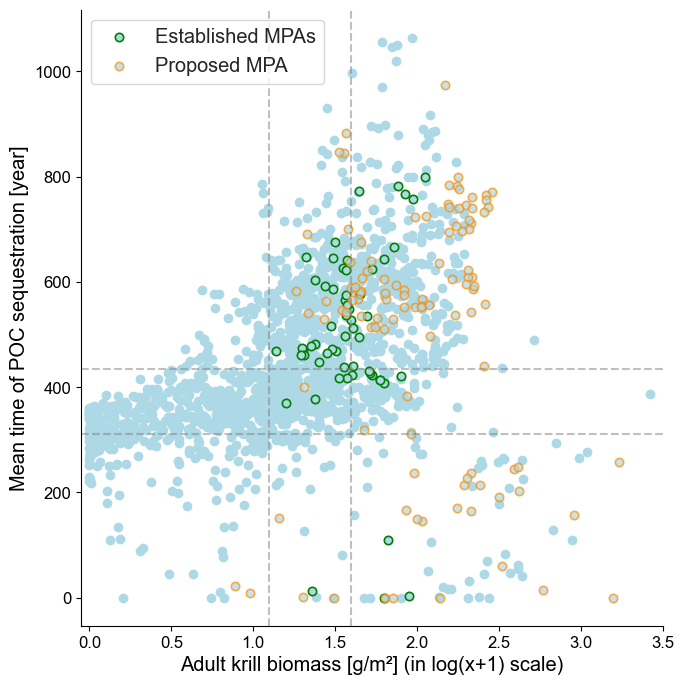

In [56]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.set_style("white")
sns.despine()

p= ax1.scatter(zones_no_protection["krill_adult_log"], zones_no_protection["mean_seq_time"],
              facecolors = 'lightblue')


p3=ax1.scatter(zones_established_protection["krill_adult_log"], zones_established_protection["mean_seq_time"],
            marker="o", 
            facecolors = 'lightblue',
            linewidths = 1.2,
            edgecolor = 'g',
            label = 'Established MPAs')



p2=ax1.scatter(zones_proposed_protection["krill_adult_log"], zones_proposed_protection["mean_seq_time"],
            marker="o", 
            facecolors = 'lightblue',
            linewidths = 1.2,
            edgecolor = 'darkorange',
            alpha= 0.7,
            label = 'Proposed MPA')


for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(12)

fig.set_figwidth(7.5)
fig.set_figheight(8)

plt.legend(loc='upper left', fontsize = 'x-large')

plt.axvline(x=1.09418, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.59819, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=311.399158, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=435.064221, alpha = 0.5, color='grey', linestyle='--')


plt.xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 'x-large')
plt.ylabel('Mean time of POC sequestration [year]', fontsize = 'x-large')

ax1.set_xlim([-0.05, 3.5])

# plt.savefig('./figures/biplot_mpas_type.png',bbox_inches='tight', dpi=300)

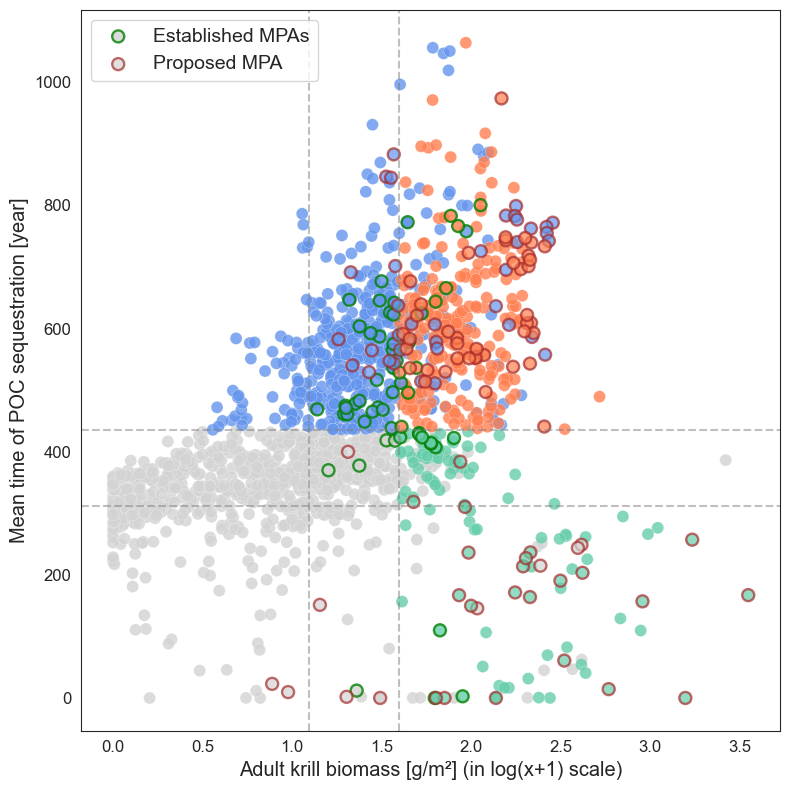

In [148]:
fig, ax = plt.subplots(figsize=(8, 8))


# Premier plot (ex: zones actuelles)
sns.scatterplot(
    data=zones_no_protection.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    palette=['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    edgecolor='white', 
    s=75, 
    linewidth=0.2,
    alpha = 0.8,
    legend=False,
    ax=ax
)


# Deuxième plot (ex: zones futures)
sns.scatterplot(
    data=zones_established_protection.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    # marker='s',  # carré pour différencier
    palette=['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    edgecolor='green', linewidth=1.7,
    s=75,
    alpha=0.8,
    label = 'Established MPAs',
    legend=False,
    ax=ax
)

# troisième plot (ex: zones futures)
sns.scatterplot(
    data=zones_proposed_protection.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    # marker='s',  # carré pour différencier
    palette=['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    edgecolor='brown', linewidth=1.7,
    s=75,
    alpha=0.7,
    label = 'Proposed MPA',
    legend=False,
    ax=ax
)

plt.legend(loc='upper left', fontsize=14)

# Ajout des lignes de quantile

plt.axvline(x=1.09418, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.59819, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=311.399158, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=435.064221, alpha = 0.5, color='grey', linestyle='--')

ax.set_xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 'x-large')
ax.set_ylabel('Mean time of POC sequestration [year]', fontsize = 'x-large')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# plt.savefig('./figures/??.png',bbox_inches='tight', dpi=300)

plt.show()

### PLot by MPA names

In [129]:
zones_ross = zones_df[zones_df['MPA_name'] == 'Ross_protected']
zones_Sork = zones_df[zones_df['MPA_name'] == 'SOrkney_protected']
zones_weddell = zones_df[zones_df['MPA_name'] == 'Weddell_protected']
zones_D1 = zones_df[zones_df['MPA_name'] == 'D1_protected']
zones_EA = zones_df[zones_df['MPA_name'] == 'EA_protected']
zones_unprotected = zones_df[zones_df['MPA_name'] == 'unprotected']

(-0.05, 3.5)

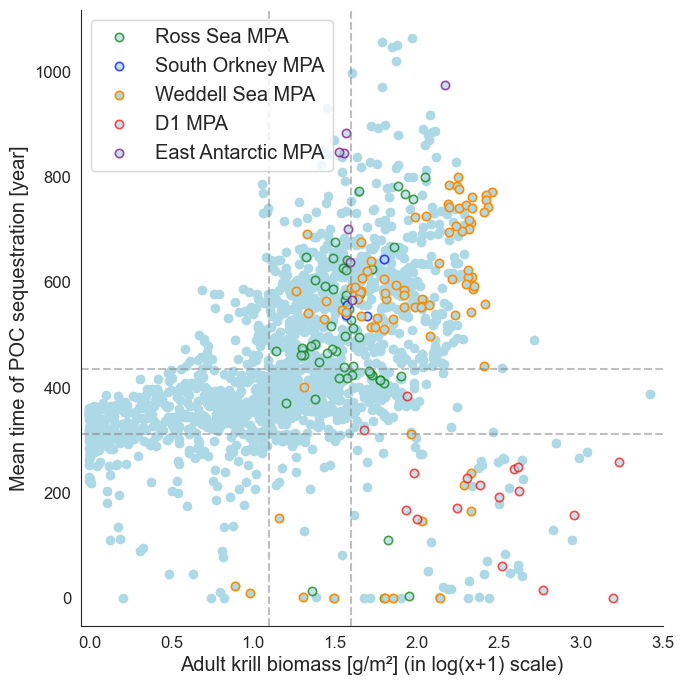

In [130]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

sns.set_style("white")
sns.despine()
p= ax1.scatter(zones_unprotected["krill_adult_log"], zones_unprotected["mean_seq_time"],
              facecolors = 'lightblue')

p6=ax1.scatter(zones_ross["krill_adult_log"], zones_ross["mean_seq_time"],
            marker="o", 
            facecolors = 'lightblue',
            linewidths = 1.2,
            edgecolor = 'g',
            alpha= 0.7,
            label = 'Ross Sea MPA')


p2=ax1.scatter(zones_Sork["krill_adult_log"], zones_Sork["mean_seq_time"],
            marker="o", 
            facecolors = 'lightblue',
            linewidths = 1.2,
            edgecolor = 'b',
            alpha= 0.7,
            label = 'South Orkney MPA')

p3=ax1.scatter(zones_weddell["krill_adult_log"], zones_weddell["mean_seq_time"],
            marker="o", 
            facecolors = 'lightblue',
            linewidths = 1.2,
            edgecolor = 'darkorange',
            label = 'Weddell Sea MPA')



p4=ax1.scatter(zones_D1["krill_adult_log"], zones_D1["mean_seq_time"],
            marker="o", 
            facecolors = 'lightblue',
            linewidths = 1.2,
            edgecolor = 'r',
            alpha= 0.7,
            label = 'D1 MPA')

p5=ax1.scatter(zones_EA["krill_adult_log"], zones_EA["mean_seq_time"],
            marker="o", 
            facecolors = 'lightblue',
            linewidths = 1.2,
            edgecolor = 'purple',
            alpha= 0.7,
            label = 'East Antarctic MPA')




for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(12)

fig.set_figwidth(7.5)
fig.set_figheight(8)

plt.legend(loc='upper left', fontsize = 'x-large')

plt.axvline(x=1.09418, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.59819, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=311.399158, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=435.064221, alpha = 0.5, color='grey', linestyle='--')


plt.xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 'x-large')
plt.ylabel('Mean time of POC sequestration [year]', fontsize = 'x-large')

ax1.set_xlim([-0.05, 3.5])

# plt.savefig('./figures/biplot_mpas_name.png',bbox_inches='tight', dpi=300)

C:\Users\anael\AppData\Local\Temp\ipykernel_80256\148723134.py:65: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(


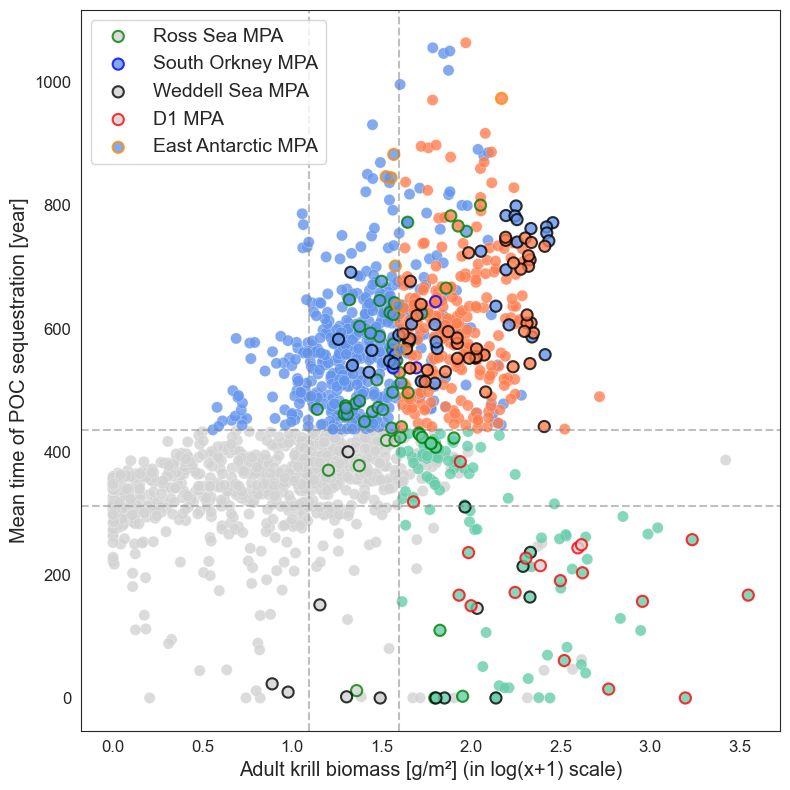

In [151]:
fig, ax = plt.subplots(figsize=(8, 8))


# Premier plot (ex: zones actuelles)
sns.scatterplot(
    data=zones_unprotected.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    palette=['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    edgecolor='white', 
    s=65, 
    linewidth=0.2,
    alpha = 0.8,
    legend=False,
    ax=ax
)


# Deuxième plot (ex: zones futures)
sns.scatterplot(
    data=zones_ross.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    # marker='s',  # carré pour différencier
    palette=['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    edgecolor='green', linewidth=1.5,
    s=65,
    alpha=0.8,
    label = 'Ross Sea MPA',
    legend=False,
    ax=ax
)

# troisième plot (ex: zones futures)
sns.scatterplot(
    data=zones_Sork.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    # marker='s',  # carré pour différencier
    palette=['cornflowerblue', 'coral'],
    edgecolor='blue', linewidth=1.5,
    s=65,
    alpha=0.8,
    label = 'South Orkney MPA',
    legend=False,
    ax=ax
)

# troisième plot (ex: zones futures)
sns.scatterplot(
    data=zones_weddell.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    # marker='s',  # carré pour différencier
    palette=['lightgrey', 'cornflowerblue', 'mediumaquamarine', 'coral'],
    edgecolor='black', linewidth=1.5,
    s=65,
    alpha=0.8,
    label = 'Weddell Sea MPA',
    legend=False,
    ax=ax
)

# troisième plot (ex: zones futures)
sns.scatterplot(
    data=zones_D1.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    # marker='s',  # carré pour différencier
    palette=['lightgrey','mediumaquamarine', 'coral'],
    edgecolor='red', linewidth=1.5,
    s=65,
    alpha=0.8,
    label = 'D1 MPA',
    legend=False,
    ax=ax
)

# troisième plot (ex: zones futures)
sns.scatterplot(
    data=zones_EA.sort_values(by='Zone_type'),
    x="krill_adult_log", y="mean_seq_time",
    hue="Zone_type",
    # marker='s',  # carré pour différencier
    palette=['cornflowerblue','coral'],
    edgecolor='darkorange', linewidth=1.5,
    s=65,
    alpha=0.8,
    label = 'East Antarctic MPA',
    legend=False,
    ax=ax
)

plt.legend(loc='upper left', fontsize=14)

# Ajout des lignes de quantile

plt.axvline(x=1.09418, alpha = 0.5, color='grey', linestyle='--')
plt.axvline(x=1.59819, alpha = 0.5, color='grey', linestyle='--')

plt.axhline(y=311.399158, alpha = 0.5, color='grey', linestyle='--')
plt.axhline(y=435.064221, alpha = 0.5, color='grey', linestyle='--')

ax.set_xlabel('Adult krill biomass [g/m²] (in log(x+1) scale)', fontsize = 'x-large')
ax.set_ylabel('Mean time of POC sequestration [year]', fontsize = 'x-large')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

# plt.savefig('./figures/??.png',bbox_inches='tight', dpi=300)

plt.show()

In [136]:
zones_Sork

label_grid  mean_seq_time  Upper_tiertile_seq  \
latitude longitude                                                  
-63      -47               0.0     643.744750                 1.0   
         -45               0.0     536.176878                 1.0   
         -43               0.0     536.527363                 1.0   
         -41               0.0     556.825768                 1.0   

                    krill_adult_log  UpTiertile_P  nb_krill_m2_log  \
latitude longitude                                                   
-63      -47                1.80125           1.0         1.845575   
         -45                1.69395           1.0         1.845575   
         -43                1.56383           0.0         1.436046   
         -41                1.57537           0.0         1.436046   

                    UpTiertile_B  label  Upper_tiertile_krill  Zone_type  \
latitude longitude                                                         
-63      -47                 1.0    3.0                   1.0        3.0   
         -45                 1.0    3.0                   1.0        3.0   
         -43                 1.0    2.5                   0.0        1.0   
         -41                 1.0    2.5                   0.0        1.0   

                       True_area           MPA_name Protection_status  
latitude longitude                                                     
-63      -47        2.220467e+10  SOrkney_protected   established_MPA  
         -45        2.220467e+10  SOrkney_protected   established_MPA  
         -43        2.220467e+10  SOrkney_protected   established_MPA  
         -41        2.220467e+10  SOrkney_protected   established_MPA

### Map MPAs

In [59]:
all_mpa_df = pd.concat([SOrkney_krill_carbon_df, Ross_krill_carbon_df, Weddell_krill_carbon_df, D1_krill_carbon_df, EA_krill_carbon_df], ignore_index=False)
all_mpa_df = all_mpa_df[['Zone_type',	'MPA_name'	]]

In [60]:
all_mpa_df = all_mpa_df.join(other = area_df, how = 'outer')
all_mpa_df

Zone_type MPA_name          AREA      MASK     True_area
latitude longitude                                                          
-79.0    -179.0           NaN      NaN  9.332850e+09  0.061111  5.703408e+08
         -177.0           NaN      NaN  9.332850e+09  0.061111  5.703408e+08
         -175.0           NaN      NaN  9.332850e+09  0.061111  5.703408e+08
         -173.0           NaN      NaN  9.332850e+09  0.061111  5.703408e+08
         -171.0           NaN      NaN  9.332850e+09  0.061111  5.703408e+08
...                       ...      ...           ...       ...           ...
-45.0     171.0           NaN      NaN  3.458337e+10  0.750000  2.593752e+10
          173.0           NaN      NaN  3.458337e+10  1.000000  3.458337e+10
          175.0           NaN      NaN  3.458337e+10  1.000000  3.458337e+10
          177.0           NaN      NaN  3.458337e+10  1.000000  3.458337e+10
          179.0           NaN      NaN  3.458337e+10  1.000000  3.458337e+10

[3240 rows x 5 columns]

In [61]:
all_mpas_zones_array = xr.Dataset.from_dataframe(all_mpa_df[['Zone_type']]) # convert into xarrayDataset
all_mpas_zones_array = xr.Dataset.to_array(all_mpas_zones_array)
all_mpas_zones_array = all_mpas_zones_array.where(all_mpas_zones_array.latitude < -60, drop=True)

In [62]:
os.getcwd()

'C:\\Users\\anael\\Documents\\PhD\\4_krill_fisheries_Carbon_seq_time\\Git_repo\\Key_Areas_krill_carbon_sequestration'

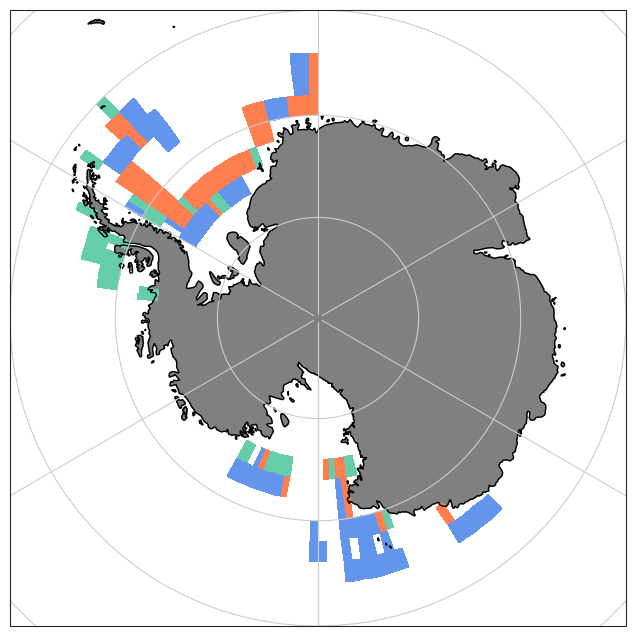

In [63]:
fig = plt.figure(figsize=(8, 8))

map_proj = ccrs.SouthPolarStereo()

p = all_mpas_zones_array.plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj}, # the plot's projection
    levels=[1, 2, 3, 4], 
    colors = ['white', 'cornflowerblue', 'mediumaquamarine', 'coral']
)  


### Add features:
p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
plt.title('')

# save
plt.savefig('./figures/map_zone_types_MPAs.png',bbox_inches='tight', dpi=300)

plt.show(p)

In [136]:
gdf = MPAs[5:]
gdf

,GAR_ID,GAR_Name,GAR_Short_,GAR_Long_L,GAR_Start_,GAR_End_Da,GAR_Descri,GAR_Refere,CreatedBy,CreatedOn,ModifiedBy,ModifiedOn,GAR_Size,geometry
5,92652,MPA SO-SS,SOSS,SO-SS,2009-12-01,None,The South Orkney Islands southern shelf marine...,CCAMLR-XXVIII paragraphs 7.1; CM 91-03,Tim,2016-11-17,Tim,2016-11-17,93750.79,"POLYGON ((-41.00000 -61.50000, -41.00000 -64.0..."


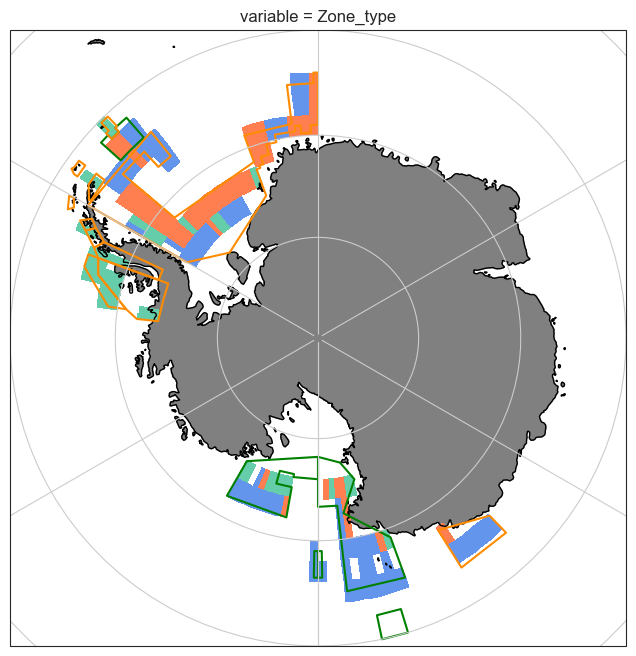

In [70]:
fig = plt.figure(figsize=(8, 8))
map_proj = ccrs.SouthPolarStereo()

p = all_mpas_zones_array.plot(
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    subplot_kws={"projection": map_proj},
    levels=[1, 2, 3, 4],
    colors=['white', 'cornflowerblue', 'mediumaquamarine', 'coral']
)

# 3. Add features
ax = p.axes
ax.gridlines()
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.COASTLINE)

# 4. Ajouter les polygones
for geom in MPAs.loc[[5]].geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='green',
        linewidth=1.5
    )

for geom in MPA_Ross.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='green',
        linewidth=1.5
    )

for geom in MPA_weddell.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='darkorange',
        linewidth=1.5
    )
    
for geom in D1_MPA.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='darkorange',
        linewidth=1.5
    )

for geom in EA_MPA.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='darkorange',
        linewidth=1.5
    )


In [72]:
zones_array = xr.Dataset.from_dataframe(zones_df[['Zone_type']]) # convert into xarrayDataset
zones_array = xr.Dataset.to_array(zones_array)

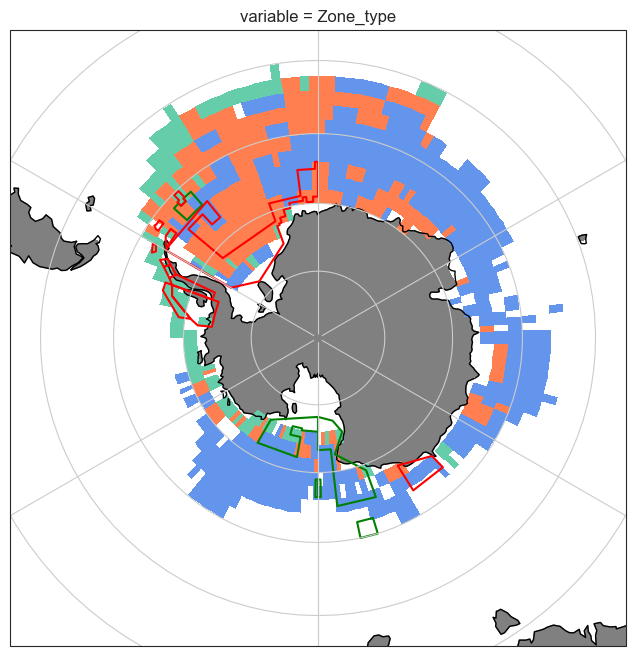

In [78]:
fig = plt.figure(figsize=(8, 8))
map_proj = ccrs.SouthPolarStereo()

p = zones_array.plot(
    transform=ccrs.PlateCarree(),
    add_colorbar=False,
    subplot_kws={"projection": map_proj},
    levels=[1, 2, 3, 4],
    colors=['white', 'cornflowerblue', 'mediumaquamarine', 'coral']
)

# 3. Add features
ax = p.axes
ax.gridlines()
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.COASTLINE)

# 4. Ajouter les polygones
for geom in MPAs.loc[[5]].geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='green',
        linewidth=1.5
    )

for geom in MPA_Ross.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='green',
        linewidth=1.5
    )
    
for geom in MPA_weddell.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='red',
        linewidth=1.5
    )
    
for geom in D1_MPA.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='red',
        linewidth=1.5
    )

for geom in EA_MPA.geometry:
    ax.add_geometries(
        [geom],
        crs=ccrs.PlateCarree(),
        facecolor='none',
        edgecolor='red',
        linewidth=1.5
    )
